In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [31]:
df= pd.read_csv('layout_dataset.csv')
df

,Site Number,Site Size (sq ft),City Range (km),Road Distance (m),Price per sq ft,Total Price
0,L1A6,1800,1,12.34,3018.54,5433364.53
1,L1A7,1500,5,10.98,2441.66,3662487.80
2,L1A3,1800,8,10.37,2162.65,3892764.57
3,L1B4,1200,7,10.98,2267.15,2720584.30
4,L1B9,1200,3,10.32,3011.64,3613974.00
...,...,...,...,...,...,...
495,L25C6,2400,6,9.77,2770.08,6648201.78
496,L25A4,1500,5,10.06,2684.84,4027253.41
497,L25B1,2400,4,10.78,2430.51,5833217.33
498,L25A3,2400,8,11.20,2216.61,5319858.27


In [33]:
df=df.iloc[:,1:]
df

,Site Size (sq ft),City Range (km),Road Distance (m),Price per sq ft,Total Price
0,1800,1,12.34,3018.54,5433364.53
1,1500,5,10.98,2441.66,3662487.80
2,1800,8,10.37,2162.65,3892764.57
3,1200,7,10.98,2267.15,2720584.30
4,1200,3,10.32,3011.64,3613974.00
...,...,...,...,...,...
495,2400,6,9.77,2770.08,6648201.78
496,1500,5,10.06,2684.84,4027253.41
497,2400,4,10.78,2430.51,5833217.33
498,2400,8,11.20,2216.61,5319858.27


In [37]:
df=df.drop(columns=['Price per sq ft'])


In [39]:
df

,Site Size (sq ft),City Range (km),Road Distance (m),Total Price
0,1800,1,12.34,5433364.53
1,1500,5,10.98,3662487.80
2,1800,8,10.37,3892764.57
3,1200,7,10.98,2720584.30
4,1200,3,10.32,3613974.00
...,...,...,...,...
495,2400,6,9.77,6648201.78
496,1500,5,10.06,4027253.41
497,2400,4,10.78,5833217.33
498,2400,8,11.20,5319858.27


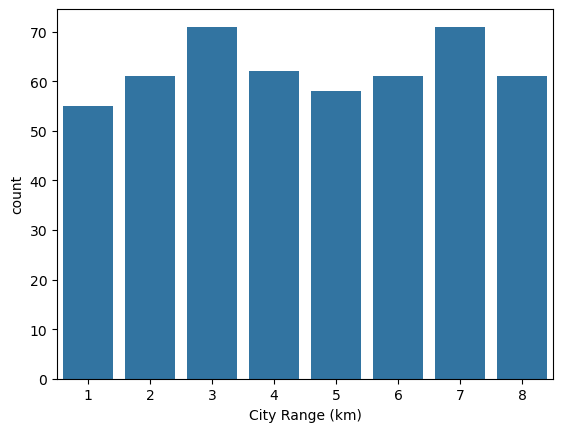

In [41]:
sns.countplot(x=df['City Range (km)'])
plt.show()

In [43]:
x= df.drop(columns=['Total Price'])

y=df['Total Price']


In [45]:
x

,Site Size (sq ft),City Range (km),Road Distance (m)
0,1800,1,12.34
1,1500,5,10.98
2,1800,8,10.37
3,1200,7,10.98
4,1200,3,10.32
...,...,...,...
495,2400,6,9.77
496,1500,5,10.06
497,2400,4,10.78
498,2400,8,11.20


In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y ,test_size= 0.2,random_state=32)

In [49]:
y_train

254    4615077.10
486    3625386.49
440    4264275.91
32     4253180.25
366    4397359.78
          ...    
380    2695637.36
310    7228701.39
389    3400000.59
43     4582878.94
215    4916489.68
Name: Total Price, Length: 400, dtype: float64

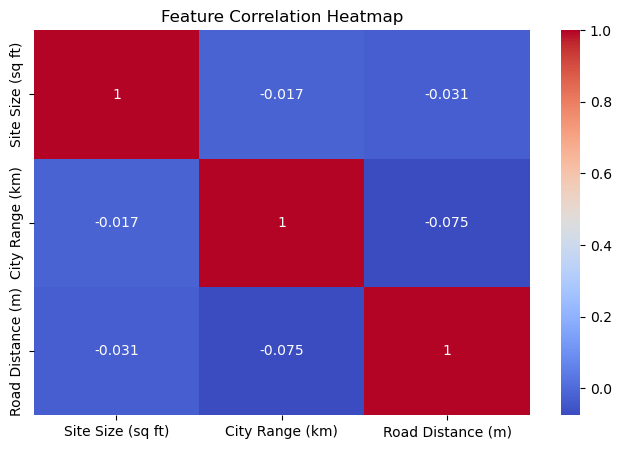

In [51]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.heatmap(x.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


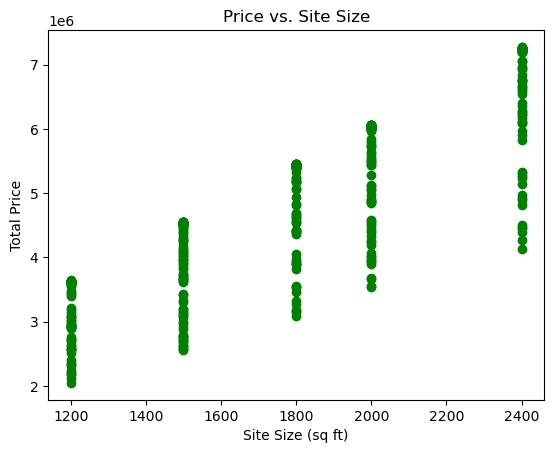

In [69]:
plt.scatter(x=x_train["Site Size (sq ft)"], y=y_train, color='green')
plt.xlabel("Site Size (sq ft)")
plt.ylabel("Total Price")
plt.title("Price vs. Site Size")
plt.show()


In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()), # Step 1: feature scaling
    ('poly',PolynomialFeatures(degree=2)),
    ('model', LinearRegression())      # Step 2: model training
])

In [73]:
#model= LinearRegression()
pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.3f}")

Mean Absolute Error (MAE): 227881.08
Root Mean Squared Error (RMSE): 362143.67
R² Score: 0.932


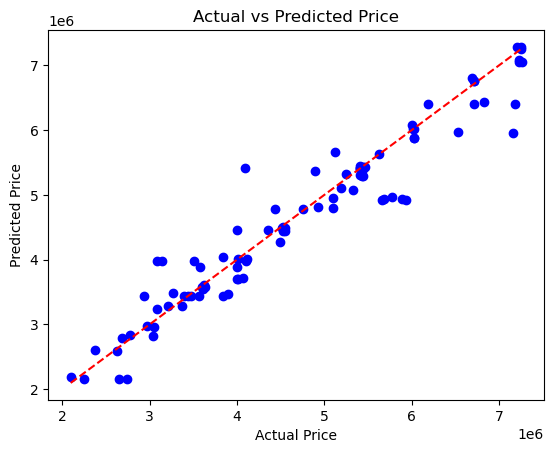

In [75]:
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()



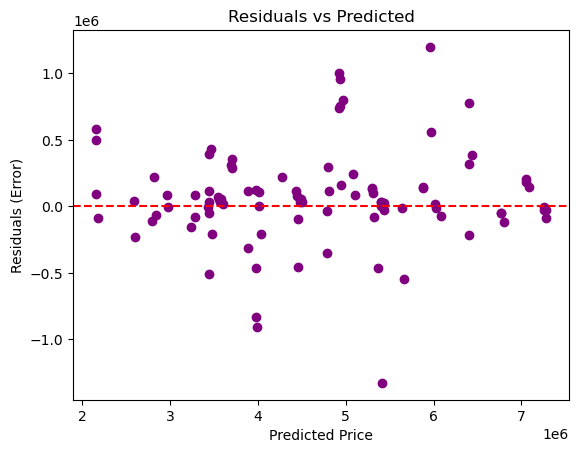

In [77]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals (Error)")
plt.title("Residuals vs Predicted")
plt.show()


In [81]:
import joblib

joblib.dump(pipe, "real_estate_price_pipeline.pkl")
print("✅ Pipeline saved successfully!")


✅ Pipeline saved successfully!
